In [1]:
import numpy as np
from numpy import genfromtxt

In [2]:
dataset = genfromtxt('PCA_practice_dataset.csv',delimiter=',')

In [3]:
print(dataset) 
print(dataset.shape)


[[-0.03125     0.236364    0.238095   ... -0.1875      0.495146
   0.515789  ]
 [-0.03125     0.309091    0.380952   ...  0.125       0.533981
   0.368421  ]
 [-0.03125     0.381818    0.261905   ... -0.03125     0.650485
   0.452632  ]
 ...
 [-0.13697517 -0.06848028 -0.46606699 ... -0.18151242 -0.05307943
  -0.41632828]
 [-0.16307672 -0.0909091  -0.47619    ... -0.03125     0.0873786
  -0.263158  ]
 [-0.16611772 -0.16459449 -0.55639249 ... -0.12664685 -0.07000765
  -0.326316  ]]
(8042, 35)


In [4]:
type(dataset)

numpy.ndarray

In [5]:
train_dataset = np.matrix(dataset)

In [6]:
type(train_dataset)

numpy.matrixlib.defmatrix.matrix

In [7]:
train_dataset[1]

matrix([[-0.03125  ,  0.309091 ,  0.380952 ,  0.0743802,  0.129032 ,
          0.472727 ,  0.557895 ,  0.078125 , -0.03125  ,  0.398058 ,
          0.263158 ,  0.015625 , -0.0322581,  0.442308 ,  0.326087 ,
          0.0338983, -0.0625   ,  0.533981 ,  0.39759  , -0.0243902,
         -0.138462 ,  0.359223 ,  0.422222 , -0.024    ,  0.       ,
          0.519231 ,  0.425287 ,  0.       ,  0.138462 ,  0.663366 ,
          0.368421 ,  0.015625 ,  0.125    ,  0.533981 ,  0.368421 ]])

In [8]:
print(train_dataset.shape)

(8042, 35)


In [9]:
mean = np.mean(train_dataset , axis=0 )
print(mean.shape)
std = np.std(train_dataset , axis=0)
print(std.shape)

(1, 35)
(1, 35)


In [10]:
train_dataset = (train_dataset -mean)/std            #standardized matrix 

In [11]:
cov = np.cov(train_dataset)
print(cov.shape)

(8042, 8042)


In [12]:
eig_val , eig_vec = np.linalg.eig(cov)         #eigen decomposition 


In [13]:
print(eig_val)
print(len(eig_val))
print(eig_vec)
print(len(eig_vec))

[4.02004983e+03+0.0000000e+00j 3.03246178e+02+0.0000000e+00j
 1.78924824e+02+0.0000000e+00j ... 1.26394778e-17+1.4422721e-17j
 1.26394778e-17-1.4422721e-17j 1.33904761e-17+0.0000000e+00j]
8042
[[-7.14637504e-05+0.00000000e+00j  2.19432126e-02+0.00000000e+00j
  -1.09358438e-03+0.00000000e+00j ... -5.39577619e-04+3.98021671e-05j
  -5.39577619e-04-3.98021671e-05j  9.37138113e-05+0.00000000e+00j]
 [-6.17086585e-04+0.00000000e+00j  1.59171461e-02+0.00000000e+00j
   4.76103542e-03+0.00000000e+00j ... -3.77129013e-05-2.07462445e-05j
  -3.77129013e-05+2.07462445e-05j  6.72674174e-06+0.00000000e+00j]
 [-1.81376245e-03+0.00000000e+00j  2.08385354e-02+0.00000000e+00j
   1.06282933e-02+0.00000000e+00j ... -2.12539768e-07-4.67397577e-06j
  -2.12539768e-07+4.67397577e-06j  6.17784328e-06+0.00000000e+00j]
 ...
 [-8.52284489e-03+0.00000000e+00j -4.82142539e-03+0.00000000e+00j
   2.82049062e-03+0.00000000e+00j ...  3.68740264e-03+4.57223491e-03j
   3.68740264e-03-4.57223491e-03j -6.36000516e-03+0.00000

In [14]:
variance_explained = []

for i in eig_val:
    variance_explained.append((i/sum(eig_val))*100)
print(variance_explained)          #78 % of the variance of our data is explained by the first principal component




[(78.23784538240768+0j), (5.901749621513581+0j), (3.482218699131024+0j), (2.7855461930127516+0j), (1.97662056319639+0j), (1.8984283917272724+0j), (1.699580993163055+0j), (0.6435499873082806+0j), (0.531687818026822+0j), (0.42070218179158286+0j), (0.3240919307422701+0j), (0.24232465671043818+0j), (0.19834367091623736+0j), (0.1678534567549515+0j), (0.16155415726974703+0j), (0.1386374819317299+0j), (0.12128510078417948+0j), (0.10785469466212926+0j), (0.10271037965080962+0j), (0.09590917553445324+0j), (0.08920459663062792+0j), (0.07416774939517894+0j), (0.07015426583482119+0j), (0.06757453352386164+0j), (0.06406512796827235+0j), (0.05944522536068392+0j), (0.05656298593159993+0j), (0.052138404222444326+0j), (0.04858388995388474+0j), (0.042529278411864546+0j), (0.04120674881842631+0j), (0.036690533632188424+0j), (0.03276636317898941+0j), (0.02641576090176688+0j), (-1.0782005003030318e-15+5.95123215624444e-16j), (-1.0782005003030318e-15-5.95123215624444e-16j), (7.828422820285356e-16+6.46746579

In [15]:
cummulative_variance_explained = np.cumsum(variance_explained)
print(cummulative_variance_explained)

[ 78.23784538+0.00000000e+00j  84.139595  +0.00000000e+00j
  87.6218137 +0.00000000e+00j ... 100.        +2.80693688e-19j
 100.        +0.00000000e+00j 100.        +0.00000000e+00j]


In [16]:
#right singular vectors
#singular value decomposition


In [17]:
eigen_vec_ls = []

for i in range(eig_vec.shape[1]):
    eig1 = train_dataset.T@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    eigen_vec_ls.append(np.ravel(eig1))

Number of components retained is 1
Number of components retained is 1
Number of components retained is 1
Number of components retained is 1
Number of components retained is 1
Number of components retained is 1
Number of components retained is 1
Number of components retained is 1


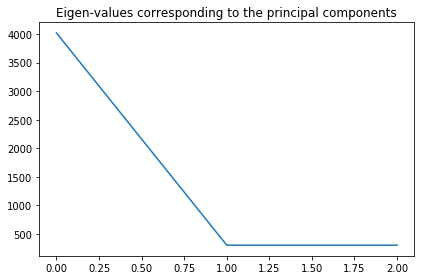

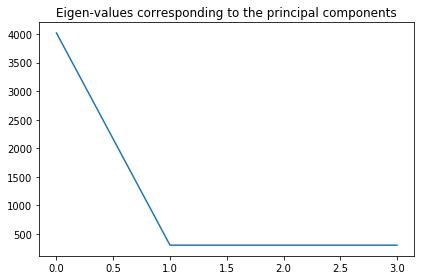

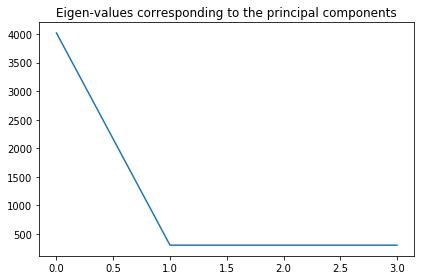

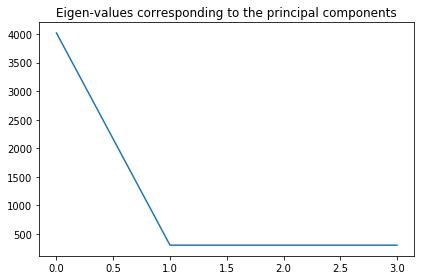

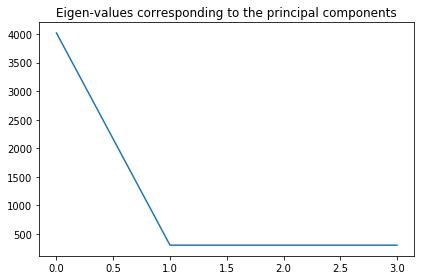

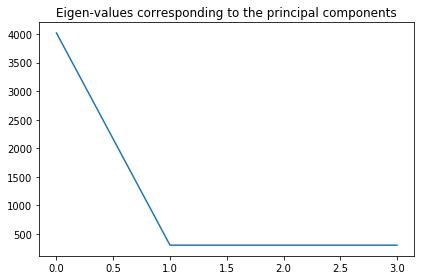

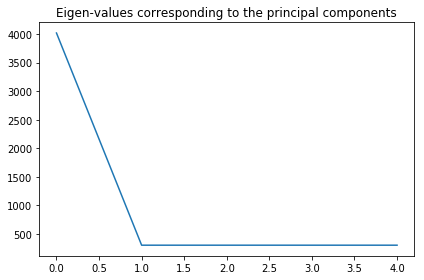

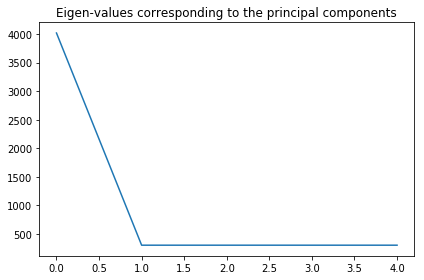

In [19]:
#pca and screeplot

import matplotlib.pyplot as plt
#principal compoent
sort_idx = np.argsort(eig_val)
sort_idx = sort_idx[::-1]

eig_val_sum =np.sum(eig_val)
for j in np.arange (.9 , 0.98 , 0.01):
    temp_sum = 0
    principal_eig_vec = []
    principal_eig_val = []
    i =0

    while(temp_sum < j *eig_val_sum):
        principal_eig_vec.append(eigen_vec_ls[sort_idx[i]])
        principal_eig_val.append(eig_val[sort_idx[i]])
        temp_sum +=eig_val[sort_idx[i]]
        i =+1
    print("Number of components retained is {}".format(i))
    
    fig, ax = plt.subplots()

    ax.plot(principal_eig_val)
    ax.set_title("Eigen-values corresponding to the principal components")

    plt.tight_layout()